In [33]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
pos = pd.read_csv('.../FINALProcessed_wellbeing_text.csv', encoding='UTF-8', header=None)
neg = pd.read_csv('.../SVM model/FINALProcessed_non_wellbeing_text.csv', encoding='UTF-8', header=None)

In [35]:
# Combine data and labels
x = np.concatenate((pos[0], neg[0]))  # Assuming column 0 contains the text
y = np.concatenate((np.ones(len(pos)), np.zeros(len(neg))))  # 1 for positive, 0 for negative

In [36]:
# Shuffle and split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace missing values in x_train and x_test
x_train = pd.Series(x_train).fillna("").tolist()  # Replace NaN with empty strings
x_test = pd.Series(x_test).fillna("").tolist()

# Use TfidfVectorizer for text representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [38]:
# Train the SVM model
model = SVC(kernel='rbf', verbose=True)
model.fit(x_train_tfidf, y_train)

[LibSVM]

SVC(verbose=True)

In [ ]:
# Save the model and vectorizer for later use
joblib.dump(model, '.../wellbeing_svm_tfidf.pkl')
joblib.dump(tfidf_vectorizer, '.../tfidf_vectorizer.pkl')

['D:/UvA-DE/GIT/XplorIT_uva/SVM model/tfidf_vectorizer.pkl']

Accuracy on test set: 0.8947368421052632

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        22
         1.0       0.88      0.88      0.88        16

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



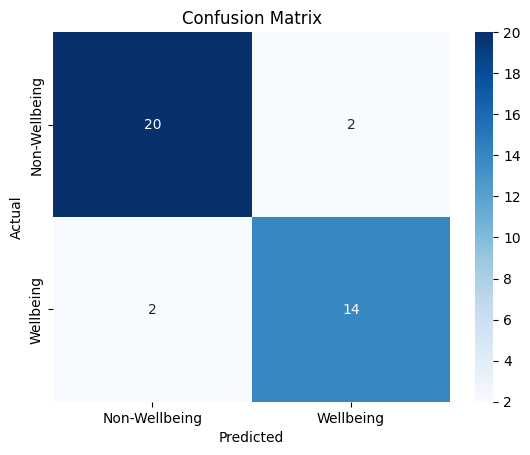

In [40]:
# ===== Model Evaluation =====

# Predict on the test set
y_pred = model.predict(x_test_tfidf)

# Accuracy and classification report
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Wellbeing', 'Wellbeing'], yticklabels=['Non-Wellbeing', 'Wellbeing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Prediction function
def svm_predict(query):
    # Load the saved model and vectorizer
    model = joblib.load('.../wellbeing_svm_tfidf.pkl')
    vectorizer = joblib.load('.../tfidf_vectorizer.pkl')

    # Transform the query using the vectorizer
    query_vec = vectorizer.transform([query])

    # Predict the category
    result = model.predict(query_vec)[0]  # Extract the single result
    if int(result) == 1:
        print('category: wellbeing')
    elif int(result) == 0:
        print('category: non-wellbeing')

In [45]:
# Example usage
query = "machine garden day little sun today little less water tomorrow fallow fruitful season design flaw wiser perpetual stainless garden today lately consistent goal school keeping fitness morning afternoon evening feeling inevitably reminded bad past event brought old feeling sadness anxiety sometimes even whenever genuinely happy bad bound happen occurred didnt didnt planned job relationship school seems progress youve made dissipated doesnt meaning logical brain true matter emotion lead dark place honestly happened recently im im let sucked dark hole picked camera join day trying better im let sucked dark hole im let sucked dark hole spoon inside head life tumultuous excited confused disorderly however calm stable life appears closer reveal theyre part human experience sometimes imagine ups life heartbeat straight line life heart monitor accepted inevitability thinking peak away moment happiness struggle lot thinking whatifs spoil happiness front finished practice sad last practice since aware phenomenon use advantage around motivate challenging period low point sooner later inevitable bit love easy cant im gon na start home road indigenous find forward sometimes enter dark place seems future hopeless event control impossible cost living environmental concern bring lot accomplishment seem meaningless grand scheme therefore try closer smaller even superficial life day day sunday new episode favorite show release recently looking forward journaling night release creativity thought sport game small saving buy people live life present work sometimes particularly stressful moment beneficial forward amlants atherapist lanaya smith crawford im sorry cried im bed im telling im boring person dont spontaneity routine order comfortable sometimes thats telling avoid comfort zone day day course thats boring im motion everyday life truly living threw planner decided spontaneous trip best friend city visit parent havent seen month excitement spontaneity refreshing rare didnt plan advance felt relaxed flexible made wasnt missing moment joy im people said happier act spontaneously according study conducted poll veto schedule im im im im im im im im im"
svm_predict(query)

query2 = "map world lot stranger especially map youve seen lot classroom office building map extremely badly wrong hopefully agree upon earth sphere mean impossible accurately depict surface twodimensional map particular common map called mercator projection youd experiment country please website called thetruesizecom video im talking let state wyoming example assumption wyoming real place land full tumbleweed population less downtown baltimore example work perfectly state square shape stack unit wyoming top distorted approach north pole point dont even recognize familiar boring shape anymore move wyoming stack south squished together approach equator happen landmass world first let state bigger texas texas bigger moving border europe answer may surprise texas bigger spain portugal put together even bigger france texas second biggest state behind alaska seems absolutely gargantuan top map alaska large isnt large taking mainland compare taking europe europe let understand bigger europe seems let start taking france moving africa first glimpse united kingdom seems pretty large let india move small united kingdom smaller quite lot place world expect place japan philippine sumatra madagascar new zealand next door new zealand australia uk small east coast comparison australia fact bigger people believe placed cover almost entire continental interestingly combination following country cover area portugal netherlands estonia albania hungary belgium bosnia herzegovina austria croatia latvia czech republic serbia switzerland slovakia lithuania denmark ireland greece bulgaria romania united kingdom italy germany france spain norway thats even factoring big big alaska north alaska united state canada seems huge canada large country roughly size china still colossus placed europe stretch east west portugal iran north barren sea russia slightly topic japan another bigger place people believe japan placed east coast comparison bigger japan often thought brazil absolutely massive country doesnt map move australia discover brazil bigger brazil larger world seven continent brazil almost larger united state span almost europe fit rather snugly africa discover africa colossal continent dont often realize almost fit entire contiguous united state sahara desert continent squeeze china western europe india argentina scandinavia uk still room left russia another place pretty big top map dropped next africa seems smaller map telling beforehand still africa democratic republic congo used colony belgium belgium comparison finally place map north south let start sweden big comparing madagascar isnt iceland seems large island roughly size tasmania south australia finally white elephant room greenland tower behemoth top map greenland masquerade continent looking bare australia south america comparable north america reality greenland smaller globe reveals greenland island pretend isnt accurate depiction compare australia south america north america course cant forget shy continent world everybody forgets antarctica spends hiding away bottom map people dont truly good understanding size antarctica either larger smaller truth antarctica huge continent bigger australia stretch kiev uganda incredibly placed southernmost tip texas united state stretch northernmost island canada example youve understood point world bigger place smaller place previously thought leave comment saying found interesting another crazy fact may discovered already knew check brilliant website used resource making video thetruesizecom hope youll subscribe channel clicking interested watching content future real life lore"
svm_predict(query2)

category: wellbeing
category: non-wellbeing
